In [1]:
from numpy import *
from GRpy.all import *
init_printing()
%matplotlib inline
#init_printing(use_latex='mathjax')

In [2]:
t, x0, r, th, phi = symbols('t, x^0, r, theta, varphi',positive=True , real=True)
m,a = symbols('m,a', positive = True)
ut, omega, v, p2 = symbols('u_t, omega, v, p2', real=True)
M = Symbol('M', real=True)
S = Symbol('S', real=True)

In [3]:
sigma = r**2 + (a*cos(th))**2
delta = r**2 - 2*m*r + a**2

In [4]:
g = Metric((x0, r, th, phi))
g[-0,-0] = (1-(2*m*r/sigma))
g[-0,-1] = 0
g[-0,-2] = 0
g[-0,-3] = (2*a*m*r*sin(th)**2)/sigma
g[-1,-0] = 0
g[-1,-1] = -sigma/delta
g[-1,-2] = 0
g[-1,-3] = 0
g[-2,-0] = 0
g[-2,-1] = 0
g[-2,-2] = -sigma
g[-2,-3] = 0
g[-3,-0] = (2*a*m*r*sin(th)**2)/sigma
g[-3,-1] = 0
g[-3,-2] = 0
g[-3,-3] = -(r**2 +a**2 + (2*a**2*m*r*sin(th)**2)/sigma)*sin(th)**2

In [5]:
ginv = g.invert()
chris = Christoffel(g)
riem = Riemann(chris)

In [6]:
def dw(A,mu):
    downvector=0
    for nu in range(4):
        downvector += g.components[(-mu,-nu)]*A[nu]
    
    return simplify(downvector.subs(th,pi/2))

def down(A):
    return [dw(A,mu) for mu in range(4)]

def uw(A,mu):
    upvector=0
    for nu in range(4):
        upvector += ginv.components[(mu,nu)]*A[nu]
    
    return simplify(upvector.subs(th,pi/2))

def up(A):
    return [uw(A,mu) for mu in range(4)]

def norma(A,n):
    norma=0
    if n==1:
        for mu in range(4):
            norma += A[mu]*up(A)[mu]
            
        return simplify(norma)
    
    if n==0:
        for mu in range(4):
            norma += A[mu]*down(A)[mu]
            
        return simplify(norma)
    
    else:
        print('escriba 1 para down, y 0 para up')

In [7]:
sup=[0,0,S/r,0]
sdown=down(sup)

In [8]:
uupnonorm=[ut,0,0,omega*ut]

N=0
for i in range(4):
    for j in range(4):
        N += g.components[(-i,-j)]*uupnonorm[i]*uupnonorm[j]
        
eq=1-N.subs(th,pi/2)

utnorm=solve(eq,ut)[1]
uphinorm=omega*utnorm
uup=[simplify(utnorm),0,0,simplify(uphinorm)]
udown=down(uup)

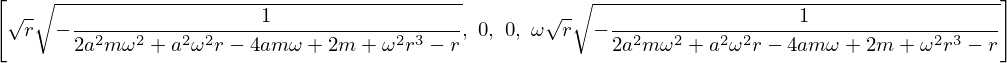

In [9]:
uup

In [10]:
def ac(alpha):
        aceleration=0
        for mu in range(4):
            for nu in range(4):
                aceleration+=chris.components[(alpha,-mu,-nu)].subs(th,pi/2)*uup[mu]*uup[nu]
                
        return simplify(aceleration)
    
aup=[ac(mu) for mu in range(4)]
adown=down(aup)

In [11]:
def lcup(i,j,k,l):
    return -LeviCivita(i,j,k,l)/(r**2)

def lcdown(i,j,k,l):
    return r**2*LeviCivita(i,j,k,l)

In [12]:
def spintensor(mu,nu):
    st=0
    for alpha in range(4):
        for beta in range(4):
            st+=lcup(mu,nu,alpha,beta)*sdown[alpha]*udown[beta]
    
    return simplify(st)

In [13]:
def termino(mu):
    termino=0
    for nu in range(4):
                termino += -spintensor(mu,nu)*adown[nu]
    return termino

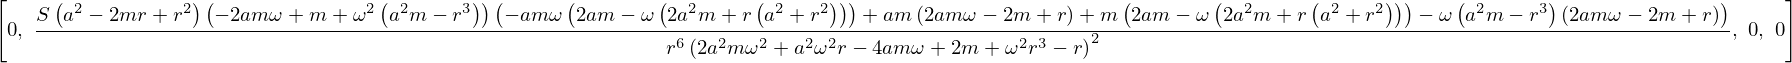

In [14]:
def dphideq(mu):
    dphid=0
    for alpha in range(4):
        for beta in range(4):
            dphid+=chris.components[(mu,-alpha,-beta)]*termino(alpha)*uup[beta]
            
    return simplify(dphid.subs(th,pi/2))

dphid=[dphideq(mu) for mu in range(4)]

dphid

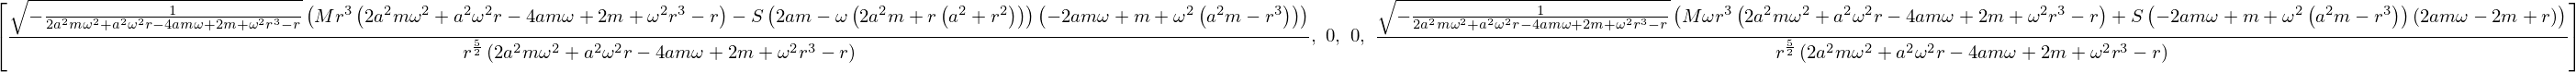

In [15]:
def pmu(mu):
    return simplify(M*uup[mu]+termino(mu))

pup=[pmu(mu) for mu in range(4)]
pdown=down(pup)

pup

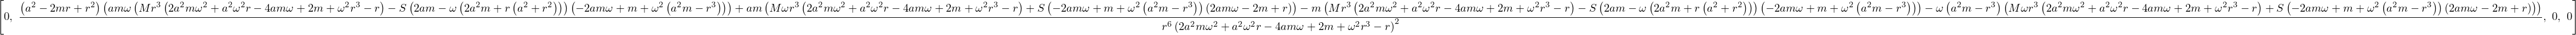

In [16]:
def dp(mu):
    dp=0
    for alpha in range(4):
        for beta in range(4):
            dp+=chris.components[(mu,-alpha,-beta)]*pup[alpha]*uup[beta]
            
    return simplify(dp.subs(th,pi/2))
            
dpup=[dp(mu) for mu in range(4)]
dpdown=down(dpup)

dpup

In [17]:
def fmu(mu):
    f=0
    for nu in range(4):
        for gamma in range(4):
            for sigma in range(4):
                f += Rational(1,2)*riem.components[(-nu,-gamma,-sigma,-mu)]*spintensor(nu,gamma)*uup[sigma]
        
    return simplify(f.subs(th,pi/2))

fdown=[fmu(mu) for mu in range(4)]
fup=up(fdown)

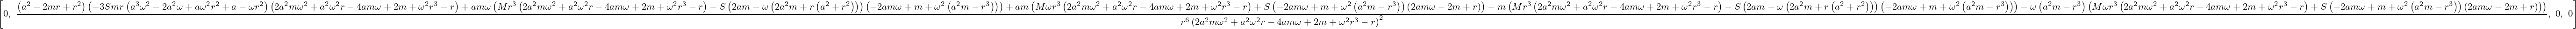

In [18]:
eq=[simplify(dpup[mu]-fup[mu]) for mu in range(4)]
eq

In [19]:
spin=simplify(solve(eq[1],S)[0])

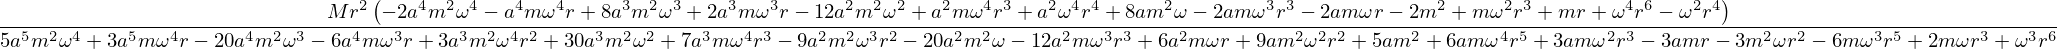

In [20]:
spin

In [21]:
supsol=[0,0,spin/r,0]
sdownsol=down(supsol)

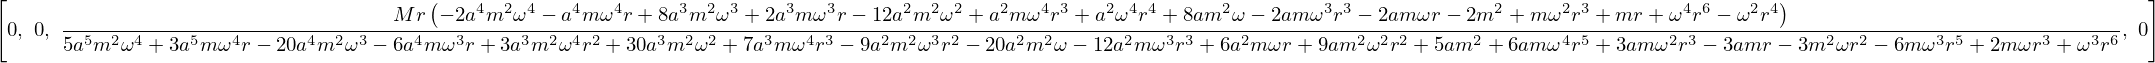

In [22]:
supsol

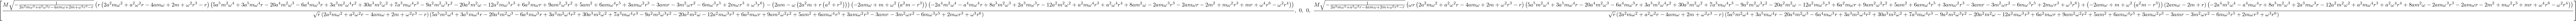

In [23]:
pupsol=[simplify(pup[mu].subs(S,spin)) for mu in range(4)]
pdownsol=down(pupsol)

pupsol

In [24]:
c2=0
for i in range(4):
    for j in range(4):
        for k in range(4):
            c2 += chris.components[(i,-j,-k)]*sdownsol[i]*uup[j]*uup[k]
            
def c3(mu):
    c=0
    for i in range(4):
        for j in range(4):
            c += chris.components[(mu,-i,-j)]*supsol[i]*uup[j]
    
    return c

def dsmu(mu):
    A=c3(mu)+uup[mu]*c2
    return simplify(A.subs(th,pi/2))
    
dsmu=[dsmu(0),dsmu(1),dsmu(2),dsmu(3)]

In [25]:
dsmu

In [26]:
condicion=0
for i in range(4):
    condicion += sup[i]*udown[i]

La condución a satisfacer es:

In [27]:
simplify(condicion)

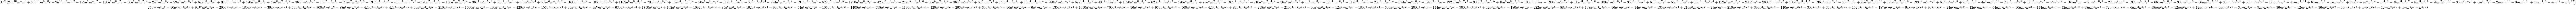

In [28]:
pcuadrado=0
for mu in range(4):
    pcuadrado+=pupsol[mu]*pdownsol[mu]
    
pp=simplify(pcuadrado)

pp

In [29]:
omega1, omega2 = solve(pp,omega)

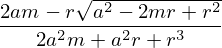

In [30]:
omega1

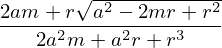

In [31]:
omega2

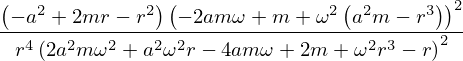

In [32]:
norma(aup,0)

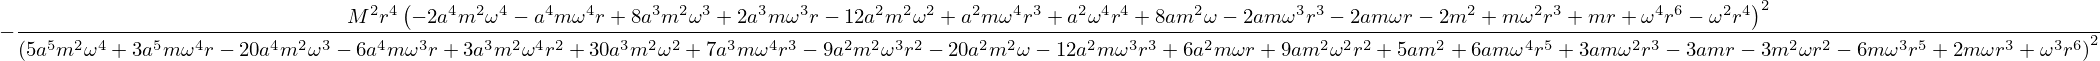

In [33]:
norma(supsol,0)

In [34]:
npp, dpp = fraction(pp)

In [35]:
from matplotlib.pyplot import*

In [36]:
w1=float(omega1.subs(a,1/2).subs(m,1).subs(M,1).subs(r,10))
w2=float(omega2.subs(a,1/2).subs(m,1).subs(M,1).subs(r,10))

omegax=linspace(w1,w2,100)
momentumy=ravel([pp.subs(a,1/2).subs(m,1).subs(M,1).subs(r,10).subs(omega,omegax[mu]) for mu in range(len(omegax))])

In [38]:
spiny=ravel([norma(supsol,0).subs(a,1/2).subs(m,1).subs(M,1).subs(r,10).subs(omega,omegax[mu]) for mu in range(len(omegax))])

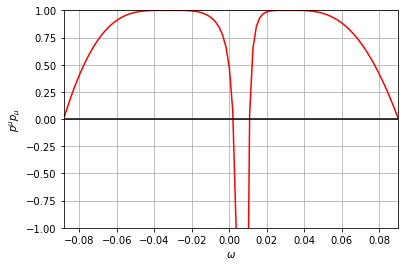

In [41]:
fig1, ax=subplots()

ax.plot(omegax,momentumy,color='red')
ax.plot(omegax,omegax*0,color='black')

ax.set_ylabel(r'$p^{\mu}p_{\mu}$')
ax.set_xlabel(r'$\omega$')
ax.set_xlim(w1,w2)
ax.set_ylim(-1,1)
ax.grid()

fig1.savefig('grafico-p-kerr.pdf')

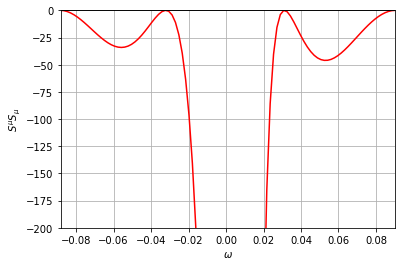

In [42]:
fig2, ax=subplots()

ax.plot(omegax,spiny,color='red')
ax.plot(omegax,omegax*0,color='black')

ax.set_ylabel(r'$S^{\mu}S_{\mu}$')
ax.set_xlabel(r'$\omega$')
ax.set_xlim(w1,w2)
ax.set_ylim(-200,0)
ax.grid()

fig2.savefig('grafico-s-kerr.pdf')

In [43]:
w3=float(omega1.subs(a,0).subs(m,1).subs(M,1).subs(r,10))
w4=float(omega2.subs(a,0).subs(m,1).subs(M,1).subs(r,10))

omegax2=linspace(w3,w4,100)
momentumy2=ravel([pp.subs(a,0).subs(m,1).subs(M,1).subs(r,10).subs(omega,omegax2[mu]) for mu in range(len(omegax2))])
spiny2=ravel([norma(supsol,0).subs(a,0).subs(m,1).subs(M,1).subs(r,10).subs(omega,omegax2[mu]) for mu in range(len(omegax2))])

In [44]:
w5=float(omega1.subs(a,0).subs(m,0).subs(M,1).subs(r,10))
w6=float(omega2.subs(a,0).subs(m,0).subs(M,1).subs(r,10))

omegax3=linspace(w5,w6,100)
momentumy3=ravel([pp.subs(a,0).subs(m,0).subs(M,1).subs(r,10).subs(omega,omegax3[mu]) for mu in range(len(omegax3))])
spiny3=ravel([norma(supsol,0).subs(a,0).subs(m,0).subs(M,1).subs(r,10).subs(omega,omegax3[mu]) for mu in range(len(omegax3))])

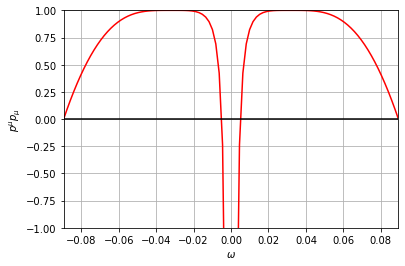

In [45]:
fig3, ax=subplots()

ax.plot(omegax2,momentumy2,color='red')
ax.plot(omegax2,omegax2*0,color='black')

ax.set_ylabel(r'$p^{\mu}p_{\mu}$')
ax.set_xlabel(r'$\omega$')
ax.set_xlim(w3,w4)
ax.set_ylim(-1,1)
ax.grid()

fig3.savefig('grafico-p-schwarzschild.pdf')

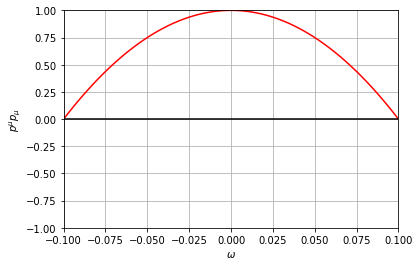

In [46]:
fig4, ax=subplots()

ax.plot(omegax3,momentumy3,color='red')
ax.plot(omegax3,omegax3*0,color='black')

ax.set_ylabel(r'$p^{\mu}p_{\mu}$')
ax.set_xlabel(r'$\omega$')
ax.set_xlim(w5,w6)
ax.set_ylim(-1,1)
ax.grid()

fig4.savefig('grafico-p-minkowski.pdf')

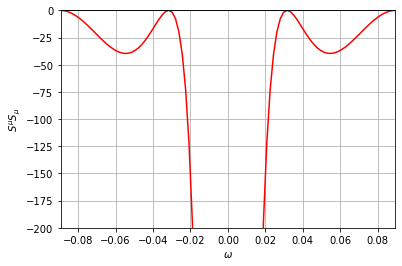

In [49]:
fig5, ax=subplots()

ax.plot(omegax2,spiny2,color='red')
ax.plot(omegax2,omegax2*0,color='black')

ax.set_ylabel(r'$S^{\mu}S_{\mu}$')
ax.set_xlabel(r'$\omega$')
ax.set_xlim(w3,w4)
ax.set_ylim(-200,0)
ax.grid()

fig5.savefig('grafico-s-schwarzschild.pdf')

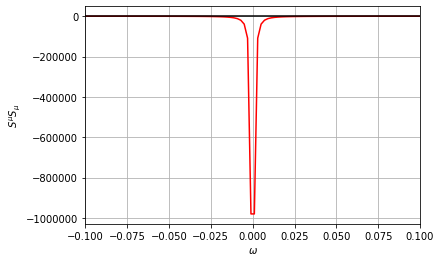

In [52]:
fig6, ax=subplots()

ax.plot(omegax3,spiny3,color='red')
ax.plot(omegax3,omegax3*0,color='black')

ax.set_ylabel(r'$S^{\mu}S_{\mu}$')
ax.set_xlabel(r'$\omega$')
ax.set_xlim(w5,w6)
#ax.set_ylim(-100,0)
ax.grid()

fig6.savefig('grafico-s-minkowski.pdf')

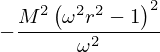

In [55]:
simplify(norma(supsol,0).subs(a,0).subs(m,0))

In [57]:
npp, dpp = fraction(pp)

In [60]:
nss, dss = fraction(norma(supsol,0))

In [59]:
nsolve(dpp.subs(a,1/2).subs(m,1).subs(M,1).subs(r,10),omega,0)

In [62]:
nsolve(dss.subs(a,1/2).subs(m,1).subs(M,1).subs(r,10),omega,0)

In [63]:
nsolve(dpp.subs(a,0).subs(m,1).subs(M,1).subs(r,10),omega,0)

In [64]:
nsolve(dss.subs(a,0).subs(m,1).subs(M,1).subs(r,10),omega,0)